### GEDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats
from datetime import datetime

In [2]:
df = pd.read_csv('/Volumes/MemoriaEle/HeavyData/incidentes-viales-c5.csv')

In [3]:
df.shape

(1383138, 18)

In [4]:
df.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

In [5]:
df = df.replace({'(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada':'A_afirmativo',
                          '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad': 'N_negativo',
                          '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente':'D_diferido',
                         '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente':'F_falsa',
                          '(I) El incidente reportado es afirmativo y se añade información adicional al evento': 'I_informativo'}) 

In [6]:
df.isnull().sum()

folio                  0
fecha_creacion         0
hora_creacion          0
dia_semana             0
codigo_cierre          0
fecha_cierre           0
año_cierre             0
mes_cierre             0
hora_cierre            0
delegacion_inicio    158
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre    140
geopoint             446
mes                    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

folio                0
fecha_creacion       0
hora_creacion        0
dia_semana           0
codigo_cierre        0
fecha_cierre         0
año_cierre           0
mes_cierre           0
hora_cierre          0
delegacion_inicio    0
incidente_c4         0
latitud              0
longitud             0
clas_con_f_alarma    0
tipo_entrada         0
delegacion_cierre    0
geopoint             0
mes                  0
dtype: int64

In [10]:
df.shape

(1382534, 18)

In [11]:
df = df[df['longitud'] > -99.35]

In [12]:
df.shape

(1382502, 18)

In [13]:
df = df[df['latitud'] < 20]

In [14]:
df.shape

(1382502, 18)

# graficos temporales
### 1

In [15]:
fechas_inicio = df.fecha_creacion.str.split("/", n=2,expand=True)
fechas_inicio

,0,1,2
0,23,01,2016
1,23,01,2016
2,24,01,2016
3,24,01,2016
4,24,01,2016
...,...,...,...
1383133,22,10,2020
1383134,22,10,2020
1383135,22,10,2020
1383136,22,10,2020


In [16]:
df['dia_inicio']=fechas_inicio[0]
df['mes_inicio']=fechas_inicio[1]
df['anio_inicio']=fechas_inicio[2]

In [17]:
df.shape

(1382502, 21)

In [18]:
df['anio_inicio'] = df['anio_inicio'].replace(['19'],'2019')
df['anio_inicio'] = df['anio_inicio'].replace(['18'],'2018')

In [19]:
fecha_separated = df.groupby(['anio_inicio','mes_inicio']).size().reset_index(name="counts")
fecha_separated

,anio_inicio,mes_inicio,counts
0,2013,12,25
1,2014,01,12264
2,2014,02,12781
3,2014,03,14711
4,2014,04,12567
...,...,...,...
78,2020,06,10394
79,2020,07,12416
80,2020,08,13608
81,2020,09,13234


In [20]:
fecha_separated=fecha_separated.drop(0)

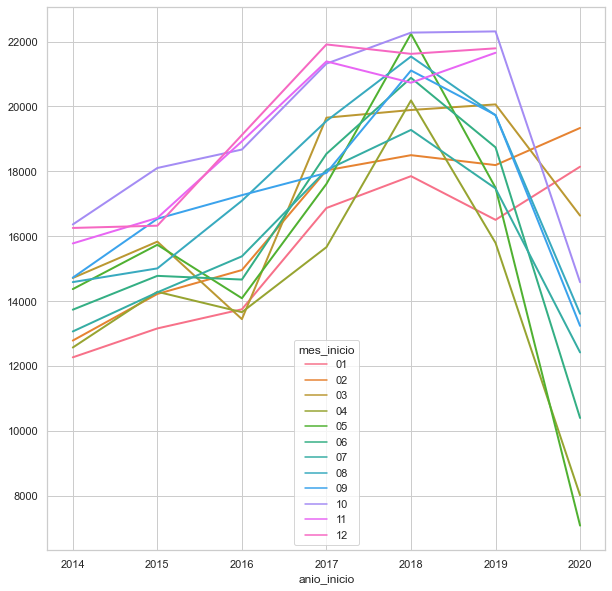

In [21]:
fecha_separated_p = fecha_separated.pivot( "anio_inicio","mes_inicio","counts")
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h=sns.lineplot(data=fecha_separated_p,linewidth = 2,dashes=False)

In [118]:
fecha_separated_p = fecha_separated.pivot("mes_inicio", "anio_inicio","counts")
fecha_separated_p

anio_inicio,2014,2015,2016,2017,2018,2019,2020
mes_inicio,,,,,,,
01,12264.0,13155.0,13745.0,16868.0,17850.0,16503.0,18142.0
02,12781.0,14218.0,14955.0,18029.0,18497.0,18191.0,19336.0
03,14711.0,15831.0,13442.0,19653.0,19890.0,20062.0,16633.0
04,12567.0,14285.0,13656.0,15661.0,20185.0,15792.0,8008.0
05,14368.0,15734.0,14086.0,17611.0,22237.0,17492.0,7076.0
06,13733.0,14776.0,14662.0,18539.0,20882.0,18738.0,10394.0
07,13062.0,14267.0,15378.0,18038.0,19276.0,17471.0,12416.0
08,14584.0,15006.0,17092.0,19552.0,21539.0,19724.0,13608.0
09,14721.0,16536.0,17264.0,17950.0,21108.0,19736.0,13234.0


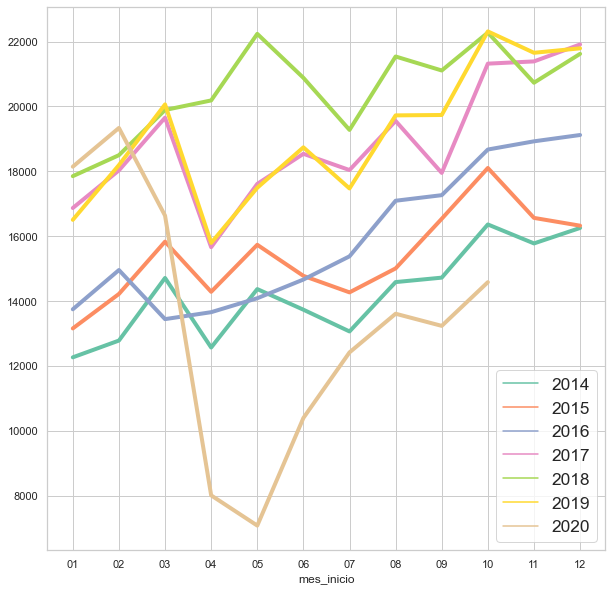

In [22]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=fecha_separated_p,linewidth = 4,dashes=False)
plt.legend(fontsize='x-large', title_fontsize='40',loc='lower right')
plt.show()

# heatmaps 

In [23]:
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])

In [24]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,A_afirmativo,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,...,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,23,01,2016
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,A_afirmativo,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,...,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,23,01,2016
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,A_afirmativo,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,...,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,24,01,2016


In [25]:
conteos_fechas = df.groupby(['fecha_creacion']).size().reset_index(name='counts')
conteos_fechas = conteos_fechas.drop(0)
conteos_fechas

,fecha_creacion,counts
1,2014-01-01,231
2,2014-01-02,484
3,2014-01-03,456
4,2014-01-04,510
5,2014-01-05,368
...,...,...
2492,2020-12-06,399
2493,2020-12-07,447
2494,2020-12-08,361
2495,2020-12-09,527


In [26]:
conteos_fechas = conteos_fechas.set_index('fecha_creacion')
conteos_fechas

,counts
fecha_creacion,
2014-01-01,231
2014-01-02,484
2014-01-03,456
2014-01-04,510
2014-01-05,368
...,...
2020-12-06,399
2020-12-07,447
2020-12-08,361


In [27]:
conteos_fechas.insert(1, 'year', conteos_fechas.index.year)
conteos_fechas.insert(2, 'month', conteos_fechas.index.month)
conteos_fechas.insert(3, 'day', conteos_fechas.index.day)
conteos_fechas = conteos_fechas.copy()

In [28]:
conteos_fechas

,counts,year,month,day
fecha_creacion,,,,
2014-01-01,231,2014,1,1
2014-01-02,484,2014,1,2
2014-01-03,456,2014,1,3
2014-01-04,510,2014,1,4
2014-01-05,368,2014,1,5
...,...,...,...,...
2020-12-06,399,2020,12,6
2020-12-07,447,2020,12,7
2020-12-08,361,2020,12,8


In [29]:
yyyy = conteos_fechas['year'].unique()
month = conteos_fechas['month'].unique()

In [30]:
yyyy

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [31]:
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
def heatmaps(data,choose_year,axis,yes):
    data1 = data.loc[data['year'] == choose_year]
    data1 = data1.pivot_table(index="day",columns="month",values='counts')
    if yes == 'yes':
        heat = sns.heatmap(data1, cbar=True, ax=axis,cmap="RdBu")
    else:
        heat = sns.heatmap(data1, cbar=False, ax=axis,cmap="RdBu")
    heat.set_title(str(choose_year))
    return heat

<AxesSubplot:title={'center':'2020'}, xlabel='month', ylabel='day'>

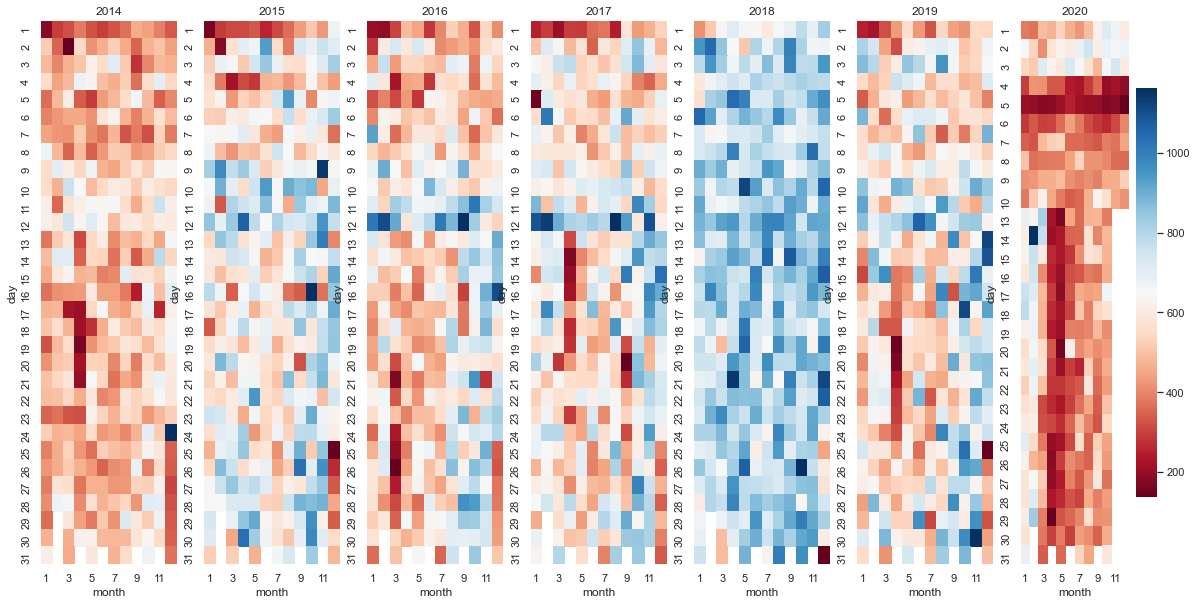

In [48]:
fig, axs = plt.subplots(figsize=(20,10),ncols=7)
heatmaps(conteos_fechas,2014,axs[0],'no')
heatmaps(conteos_fechas,2015,axs[1],'no')
heatmaps(conteos_fechas,2016,axs[2],'no')
heatmaps(conteos_fechas,2017,axs[3],'no')
heatmaps(conteos_fechas,2018,axs[4],'no')
heatmaps(conteos_fechas,2019,axs[5],'no')
heatmaps(conteos_fechas,2020,axs[6],'yes')

# otro grafico

In [37]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,A_afirmativo,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,...,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,23,01,2016
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,A_afirmativo,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,...,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,23,01,2016
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,A_afirmativo,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,...,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,24,01,2016


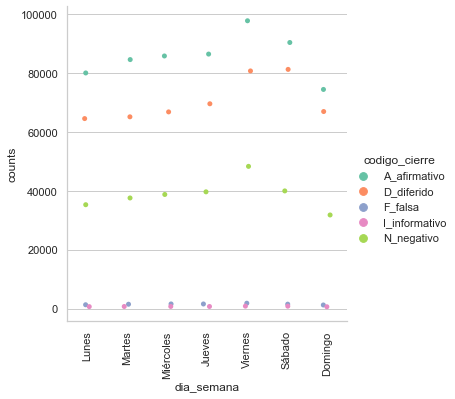

In [35]:
dia_cierre = df.groupby(['dia_semana','codigo_cierre']).size().reset_index(name="counts")
j=sns.catplot(x='dia_semana',y='counts', hue='codigo_cierre',data=dia_cierre, 
            order=(["Lunes", "Martes", "Miércoles","Jueves","Viernes","Sábado","Domingo"]))
plt.xticks(rotation= 90)
plt.show()

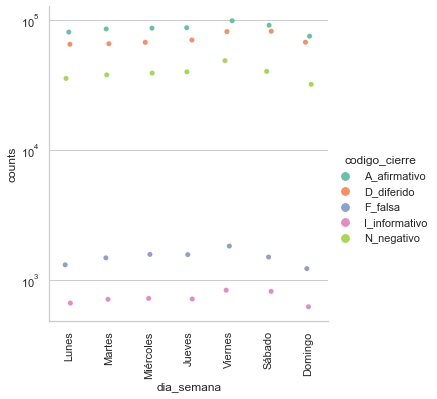

In [36]:
dia_cierre = df.groupby(['dia_semana','codigo_cierre']).size().reset_index(name="counts")
g = sns.catplot(x='dia_semana',y='counts', hue='codigo_cierre',data=dia_cierre,
                order=(["Lunes", "Martes", "Miércoles","Jueves","Viernes","Sábado","Domingo"]))
plt.yscale('log')
plt.xticks(rotation= 90)
plt.show()

# localización

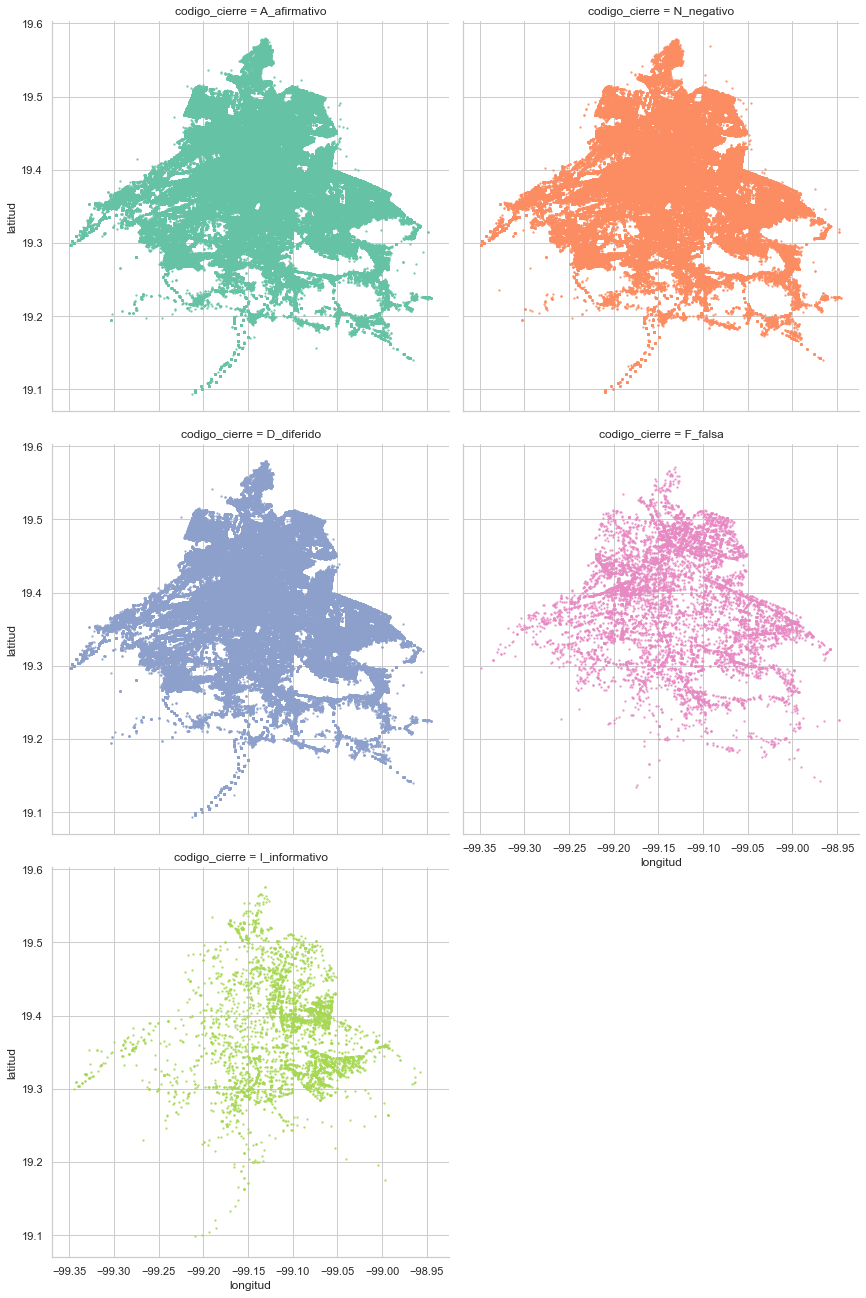

In [37]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='codigo_cierre',fit_reg=False,
            col='codigo_cierre',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

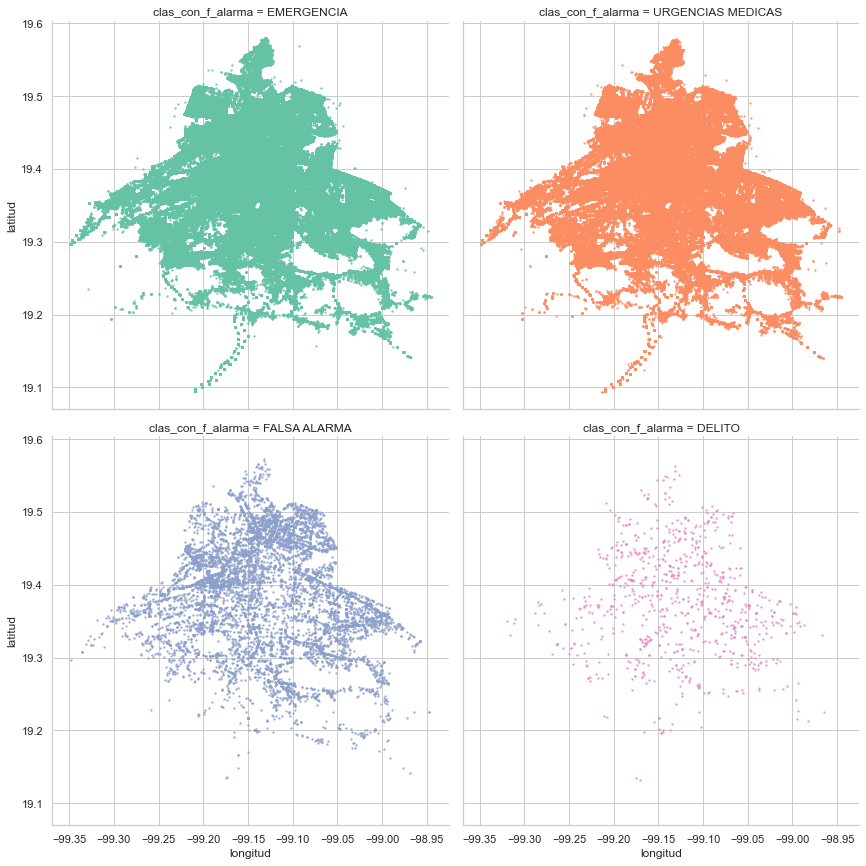

In [38]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='clas_con_f_alarma',fit_reg=False,
            col='clas_con_f_alarma',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

In [143]:
conteos_cod_cierre=df.groupby(["codigo_cierre","incidente_c4"]).size().reset_index(name="counts")
conteos_cod_cierre=conteos_cod_cierre.pivot("incidente_c4","codigo_cierre","counts")
conteos_cod_cierre=conteos_cod_cierre.fillna(0)
conteos_cod_cierre['total']=conteos_cod_cierre.sum(1)
conteos_cod_cierre =conteos_cod_cierre.sort_values('N_negativo',ascending=False)
conteos_cod_cierre

codigo_cierre,A_afirmativo,D_diferido,F_falsa,I_informativo,N_negativo,total
incidente_c4,,,,,,
accidente-choque sin lesionados,341656.0,216404.0,7623.0,3599.0,190956.0,760238.0
accidente-choque con lesionados,127973.0,142522.0,1602.0,751.0,42026.0,314874.0
lesionado-atropellado,82890.0,84895.0,808.0,580.0,24263.0,193436.0
accidente-motociclista,21579.0,26245.0,213.0,25.0,7530.0,55592.0
accidente-volcadura,12102.0,16678.0,94.0,96.0,2770.0,31740.0
accidente-persona atrapada / desbarrancada,3094.0,1306.0,38.0,7.0,1157.0,5602.0
lesionado-accidente automovilístico,3297.0,1854.0,34.0,19.0,849.0,6053.0
accidente-ciclista,1202.0,1029.0,11.0,0.0,476.0,2718.0
accidente-otros,1613.0,386.0,24.0,4.0,437.0,2464.0


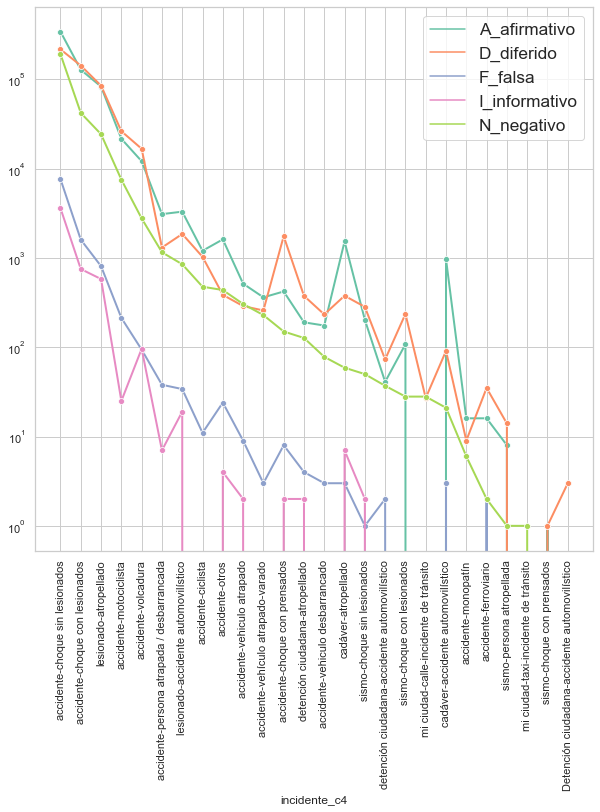

In [145]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=conteos_cod_cierre.iloc[:,0:5],linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.yscale('log')
plt.show()

In [107]:
prop=round(conteos_cod_cierre.iloc[:,0:5].apply(lambda x: x/x.sum()*100, axis=1),2)
prop

codigo_cierre,A_afirmativo,D_diferido,F_falsa,I_informativo,N_negativo
incidente_c4,,,,,
accidente-choque sin lesionados,44.94,28.47,1.00,0.47,25.12
accidente-choque con lesionados,40.64,45.26,0.51,0.24,13.35
lesionado-atropellado,42.85,43.89,0.42,0.30,12.54
accidente-motociclista,38.82,47.21,0.38,0.04,13.55
accidente-volcadura,38.13,52.55,0.30,0.30,8.73
lesionado-accidente automovilístico,54.47,30.63,0.56,0.31,14.03
accidente-persona atrapada / desbarrancada,55.23,23.31,0.68,0.12,20.65
accidente-ciclista,44.22,37.86,0.40,0.00,17.51
accidente-otros,65.46,15.67,0.97,0.16,17.74


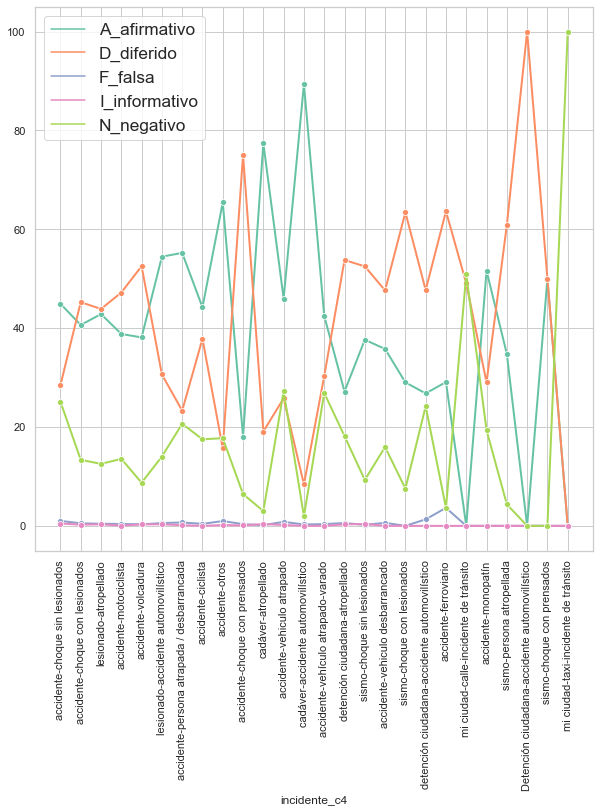

In [139]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=prop,linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

# falsas alarmas

In [41]:
falso=df.loc[df['codigo_cierre'].isin(['F_falsa','N_negativo'])]
falso.shape

(282071, 21)

In [42]:
sum(falso['codigo_cierre']=='F_falsa')

10485

In [116]:
conteos_fechas = falso.groupby(['fecha_creacion']).size().reset_index(name='counts')
conteos_fechas = conteos_fechas.drop(0)
conteos_fechas = conteos_fechas.set_index('fecha_creacion')
conteos_fechas.insert(1, 'year', conteos_fechas.index.year)
conteos_fechas.insert(2, 'month', conteos_fechas.index.month)
conteos_fechas.insert(3, 'day', conteos_fechas.index.day)
conteos_fechas = conteos_fechas.copy()

<AxesSubplot:title={'center':'2020'}, xlabel='month', ylabel='day'>

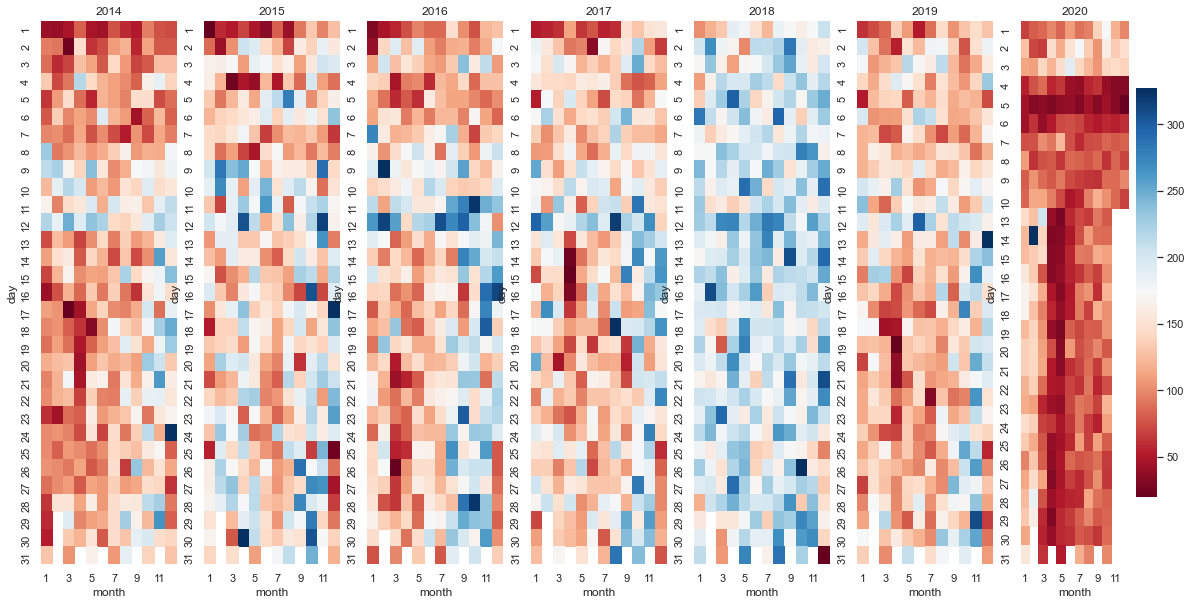

In [117]:
fig, axs = plt.subplots(figsize=(20,10),ncols=7)
heatmaps(conteos_fechas,2014,axs[0],'no')
heatmaps(conteos_fechas,2015,axs[1],'no')
heatmaps(conteos_fechas,2016,axs[2],'no')
heatmaps(conteos_fechas,2017,axs[3],'no')
heatmaps(conteos_fechas,2018,axs[4],'no')
heatmaps(conteos_fechas,2019,axs[5],'no')
heatmaps(conteos_fechas,2020,axs[6],'yes')

In [146]:
falso.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.21707,-99.21907,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.32058,-99.24101,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
5,C4/160124/02090,2016-01-24,09:01:07,Domingo,N_negativo,24/01/2016,2016,Enero,10:04:50,CUAJIMALPA,...,19.37031,-99.29058,EMERGENCIA,LLAMADA DEL 066,CUAJIMALPA,"19.37031003,-99.29058012",1,24,01,2016
14,C4/160124/05921,2016-01-24,23:31:16,Domingo,N_negativo,24/01/2016,2016,Enero,23:42:34,IZTAPALAPA,...,19.31735,-99.04262,EMERGENCIA,LLAMADA DEL 066,IZTAPALAPA,"19.31734998,-99.04262004",1,24,01,2016
19,C4/160124/00542,2016-01-24,01:34:12,Domingo,N_negativo,24/01/2016,2016,Enero,02:03:36,VENUSTIANO CARRANZA,...,19.43009,-99.05272,URGENCIAS MEDICAS,LLAMADA DEL 066,VENUSTIANO CARRANZA,"19.43009001,-99.05271984",1,24,01,2016


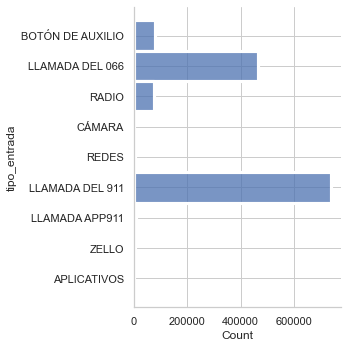

In [219]:
sns.displot(df,y='tipo_entrada')

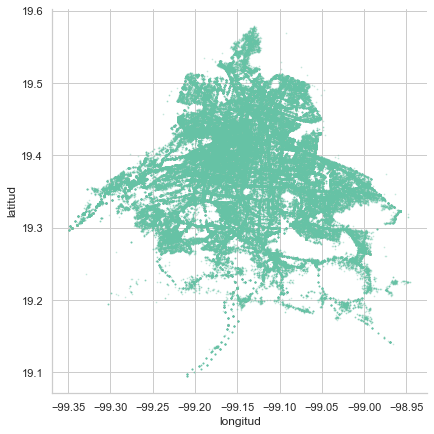

In [113]:
sns.lmplot(x='longitud',y='latitud',data=falso,fit_reg=False,
           height=6,scatter_kws={"s":0.5,"alpha":0.3})

In [98]:
falso.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
53,C4/160124/04859,2016-01-24,19:42:55,Domingo,F_falsa,24/01/2016,2016,Enero,20:08:05,GUSTAVO A. MADERO,...,19.49410,-99.078930,FALSA ALARMA,LLAMADA DEL 066,GUSTAVO A. MADERO,"19.49409999,-99.07893",1,24,01,2016
235,C4/160125/03990,2016-01-25,19:36:29,Lunes,F_falsa,25/01/2016,2016,Enero,19:46:13,IZTAPALAPA,...,19.34248,-99.047520,FALSA ALARMA,LLAMADA DEL 066,IZTAPALAPA,"19.34247996,-99.04752",1,25,01,2016
268,C4/160125/02069,2016-01-25,12:56:15,Lunes,F_falsa,25/01/2016,2016,Enero,13:52:21,MIGUEL HIDALGO,...,19.41151,-99.182340,FALSA ALARMA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.41150996,-99.18234",1,25,01,2016
279,C4/160126/02954,2016-01-26,16:13:01,Martes,F_falsa,26/01/2016,2016,Enero,17:41:47,MIGUEL HIDALGO,...,19.41427,-99.196297,FALSA ALARMA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.4142704,-99.19629669",1,26,01,2016
282,C4/160126/04678,2016-01-26,21:22:47,Martes,F_falsa,26/01/2016,2016,Enero,21:36:22,MIGUEL HIDALGO,...,19.40380,-99.192040,FALSA ALARMA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.40380002,-99.19203984",1,26,01,2016


In [217]:
bueno=df.groupby(['codigo_cierre','tipo_entrada']).size().reset_index(name="counts")
bueno=bueno.pivot("codigo_cierre", "tipo_entrada","counts")
bueno=bueno.fillna(0)
prop3=round(bueno.iloc[:,:].apply(lambda x: x/x.sum()*100, axis=1),2)
prop3

tipo_entrada,APLICATIVOS,BOTÓN DE AUXILIO,CÁMARA,LLAMADA APP911,LLAMADA DEL 066,LLAMADA DEL 911,RADIO,REDES,ZELLO
codigo_cierre,,,,,,,,,
A_afirmativo,0.00,8.28,0.52,0.40,42.28,35.98,11.87,0.28,0.38
D_diferido,0.01,5.02,0.02,1.04,20.06,72.49,0.58,0.21,0.57
F_falsa,0.00,1.56,0.05,0.66,39.87,54.79,1.96,0.72,0.39
I_informativo,0.00,5.08,0.14,0.14,74.08,14.42,5.49,0.47,0.18
N_negativo,0.01,1.34,0.02,0.67,37.70,57.96,1.15,0.69,0.46


<AxesSubplot:xlabel='codigo_cierre'>

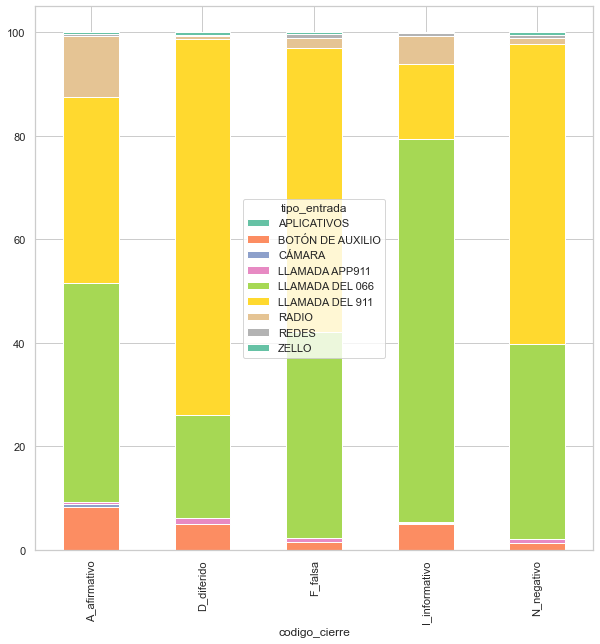

In [223]:
prop3.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='codigo_cierre'>

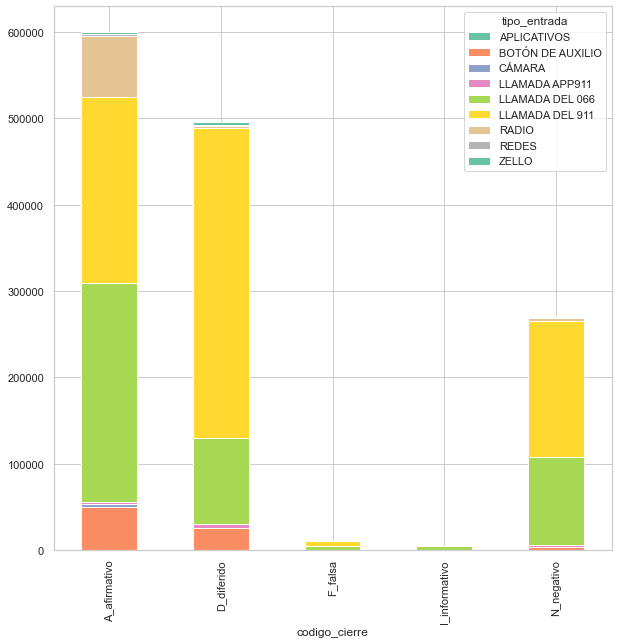

In [226]:
bueno.plot(kind='bar',stacked=True)

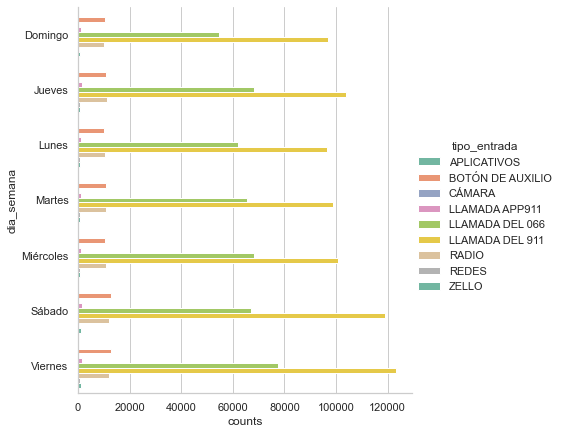

In [116]:
bueno=df.groupby(['dia_semana','tipo_entrada']).size().reset_index(name="counts")
g = sns.catplot(
    data=bueno, kind="bar",
    x="counts", y="dia_semana", hue="tipo_entrada",
    ci="sd", height=6,palette='Set2'
)

In [135]:
#falso['hora_creacion'] = falso.strftime(falso['hora_creacion'])

In [182]:
falso

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,dia_inicio,mes_inicio,anio_inicio
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,...,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,24,01,2016
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,...,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,24,01,2016
5,C4/160124/02090,2016-01-24,09:01:07,Domingo,N_negativo,24/01/2016,2016,Enero,10:04:50,CUAJIMALPA,...,19.370310,-99.290580,EMERGENCIA,LLAMADA DEL 066,CUAJIMALPA,"19.37031003,-99.29058012",1,24,01,2016
14,C4/160124/05921,2016-01-24,23:31:16,Domingo,N_negativo,24/01/2016,2016,Enero,23:42:34,IZTAPALAPA,...,19.317350,-99.042620,EMERGENCIA,LLAMADA DEL 066,IZTAPALAPA,"19.31734998,-99.04262004",1,24,01,2016
19,C4/160124/00542,2016-01-24,01:34:12,Domingo,N_negativo,24/01/2016,2016,Enero,02:03:36,VENUSTIANO CARRANZA,...,19.430090,-99.052720,URGENCIAS MEDICAS,LLAMADA DEL 066,VENUSTIANO CARRANZA,"19.43009001,-99.05271984",1,24,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383116,C5/201021/05267,2020-10-21,21:42:57,Miércoles,N_negativo,21/10/2020,2020,Octubre,21:51:12,CUAJIMALPA,...,19.299721,-99.345062,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAJIMALPA,"19.299721,-99.345062",10,21,10,2020
1383122,C5/201021/05437,2020-10-21,22:16:43,Miércoles,N_negativo,21/10/2020,2020,Octubre,22:38:10,ALVARO OBREGON,...,19.329760,-99.286700,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,"19.32975999,-99.28670004",10,21,10,2020
1383129,C5/201022/03310,2020-10-22,15:55:56,Jueves,N_negativo,22/10/2020,2020,Octubre,16:19:07,GUSTAVO A. MADERO,...,19.487450,-99.124490,URGENCIAS MEDICAS,LLAMADA DEL 911,GUSTAVO A. MADERO,"19.48744998,-99.12449016",10,22,10,2020
1383130,C5/201022/02027,2020-10-22,12:00:10,Jueves,N_negativo,22/10/2020,2020,Octubre,12:58:33,IZTAPALAPA,...,19.389680,-99.043020,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,"19.38968001,-99.04302",10,22,10,2020


In [178]:
fecha_separated2 = df.groupby(['anio_inicio','mes_inicio','codigo_cierre']).size().reset_index(name="counts")
fecha_separated2 = fecha_separated2.drop(0)
fecha_separated2

,anio_inicio,mes_inicio,codigo_cierre,counts
1,2013,12,I_informativo,5
2,2013,12,N_negativo,4
3,2014,01,A_afirmativo,10329
4,2014,01,F_falsa,31
5,2014,01,I_informativo,234
...,...,...,...,...
401,2020,10,A_afirmativo,5140
402,2020,10,D_diferido,6628
403,2020,10,F_falsa,38
404,2020,10,I_informativo,3


In [179]:
fecha_separated2['fecha_bien']= fecha_separated2['anio_inicio']+'-'+fecha_separated2['mes_inicio']
hola=fecha_separated2.drop(['anio_inicio','mes_inicio'],1)
hola=hola.set_index('fecha_bien')
hola

,codigo_cierre,counts
fecha_bien,,
2013-12,I_informativo,5
2013-12,N_negativo,4
2014-01,A_afirmativo,10329
2014-01,F_falsa,31
2014-01,I_informativo,234
...,...,...
2020-10,A_afirmativo,5140
2020-10,D_diferido,6628
2020-10,F_falsa,38


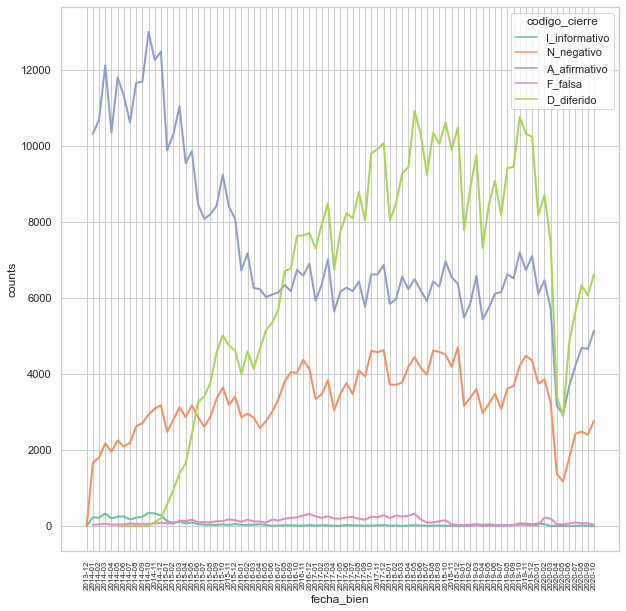

In [181]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
sns.lineplot(x='fecha_bien',y='counts',hue='codigo_cierre',data=hola,linewidth = 2)
plt.xticks(rotation= 90,size=8)
plt.show()

In [193]:
hola2=fecha_separated2.drop(['anio_inicio','mes_inicio'],1)
hola2=hola2.pivot("fecha_bien", "codigo_cierre","counts")
hola2=hola2.fillna(0)
hola2['total']=hola2.sum(1)
hola2

codigo_cierre,A_afirmativo,D_diferido,F_falsa,I_informativo,N_negativo,total
fecha_bien,,,,,,
2013-12,0.0,0.0,0.0,5.0,4.0,9.0
2014-01,10329.0,0.0,31.0,234.0,1670.0,12264.0
2014-02,10699.0,0.0,50.0,222.0,1810.0,12781.0
2014-03,12135.0,0.0,63.0,332.0,2181.0,14711.0
2014-04,10365.0,0.0,36.0,206.0,1960.0,12567.0
...,...,...,...,...,...,...
2020-06,3686.0,4842.0,70.0,3.0,1793.0,10394.0
2020-07,4228.0,5653.0,97.0,6.0,2432.0,12416.0
2020-08,4694.0,6341.0,72.0,11.0,2490.0,13608.0


In [194]:
prop2=round(hola2.iloc[:,0:5].apply(lambda x: x/x.sum()*100, axis=1),2)
prop2

codigo_cierre,A_afirmativo,D_diferido,F_falsa,I_informativo,N_negativo
fecha_bien,,,,,
2013-12,0.00,0.00,0.00,55.56,44.44
2014-01,84.22,0.00,0.25,1.91,13.62
2014-02,83.71,0.00,0.39,1.74,14.16
2014-03,82.49,0.00,0.43,2.26,14.83
2014-04,82.48,0.00,0.29,1.64,15.60
...,...,...,...,...,...
2020-06,35.46,46.58,0.67,0.03,17.25
2020-07,34.05,45.53,0.78,0.05,19.59
2020-08,34.49,46.60,0.53,0.08,18.30


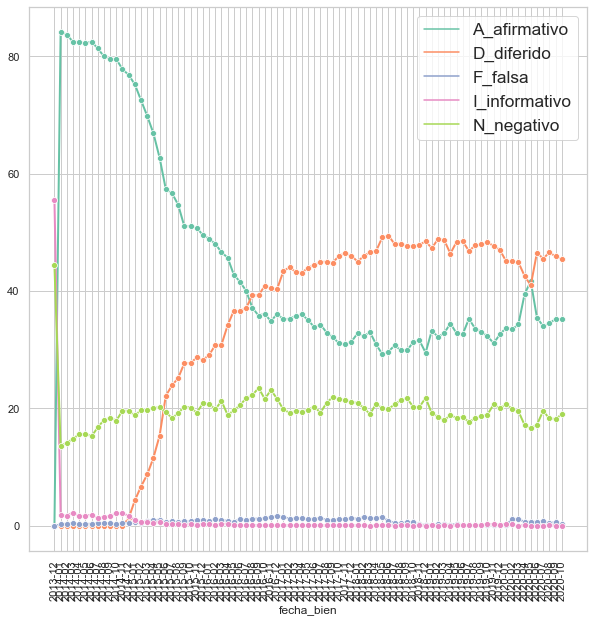

In [196]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=prop2,linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

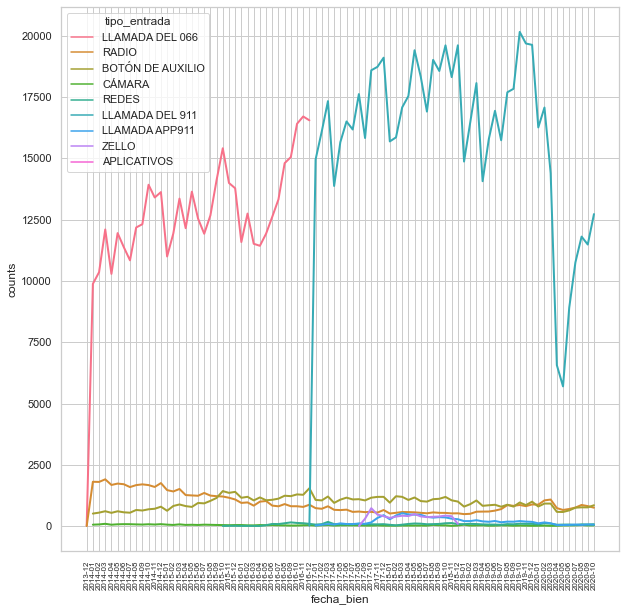

In [201]:
fecha_separated2 = df.groupby(['anio_inicio','mes_inicio','tipo_entrada']).size().reset_index(name="counts")
fecha_separated2 = fecha_separated2.drop(0)
fecha_separated2['fecha_bien']= fecha_separated2['anio_inicio']+'-'+fecha_separated2['mes_inicio']
hola=fecha_separated2.drop(['anio_inicio','mes_inicio'],1)
hola=hola.set_index('fecha_bien')
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
sns.lineplot(x='fecha_bien',y='counts',hue='tipo_entrada',data=hola,linewidth = 2)
plt.xticks(rotation= 90,size=8)
plt.show()

In [204]:
hola2=fecha_separated2.drop(['anio_inicio','mes_inicio'],1)
hola2=hola2.pivot("fecha_bien", "tipo_entrada","counts")
hola2

tipo_entrada,APLICATIVOS,BOTÓN DE AUXILIO,CÁMARA,LLAMADA APP911,LLAMADA DEL 066,LLAMADA DEL 911,RADIO,REDES,ZELLO
fecha_bien,,,,,,,,,
2013-12,NaN,NaN,NaN,NaN,19.0,NaN,5.0,NaN,NaN
2014-01,NaN,513.0,61.0,NaN,9880.0,NaN,1810.0,NaN,NaN
2014-02,NaN,552.0,71.0,NaN,10354.0,NaN,1804.0,NaN,NaN
2014-03,NaN,609.0,96.0,NaN,12096.0,NaN,1910.0,NaN,NaN
2014-04,NaN,543.0,59.0,NaN,10285.0,NaN,1680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-06,NaN,643.0,31.0,51.0,NaN,8904.0,700.0,65.0,NaN
2020-07,NaN,754.0,35.0,67.0,NaN,10754.0,758.0,48.0,NaN
2020-08,NaN,768.0,45.0,51.0,NaN,11806.0,864.0,74.0,NaN


In [206]:
hola2=hola2.fillna(0)
hola2['total']=hola2.sum(1)
prop2=round(hola2.iloc[:,0:8].apply(lambda x: x/x.sum()*100, axis=1),2)
prop2

tipo_entrada,APLICATIVOS,BOTÓN DE AUXILIO,CÁMARA,LLAMADA APP911,LLAMADA DEL 066,LLAMADA DEL 911,RADIO,REDES
fecha_bien,,,,,,,,
2013-12,0.00,0.00,0.00,0.00,79.17,0.00,20.83,0.00
2014-01,0.00,4.18,0.50,0.00,80.56,0.00,14.76,0.00
2014-02,0.00,4.32,0.56,0.00,81.01,0.00,14.11,0.00
2014-03,0.00,4.14,0.65,0.00,82.22,0.00,12.98,0.00
2014-04,0.00,4.32,0.47,0.00,81.84,0.00,13.37,0.00
...,...,...,...,...,...,...,...,...
2020-06,0.00,6.19,0.30,0.49,0.00,85.66,6.73,0.63
2020-07,0.00,6.07,0.28,0.54,0.00,86.61,6.11,0.39
2020-08,0.00,5.64,0.33,0.37,0.00,86.76,6.35,0.54


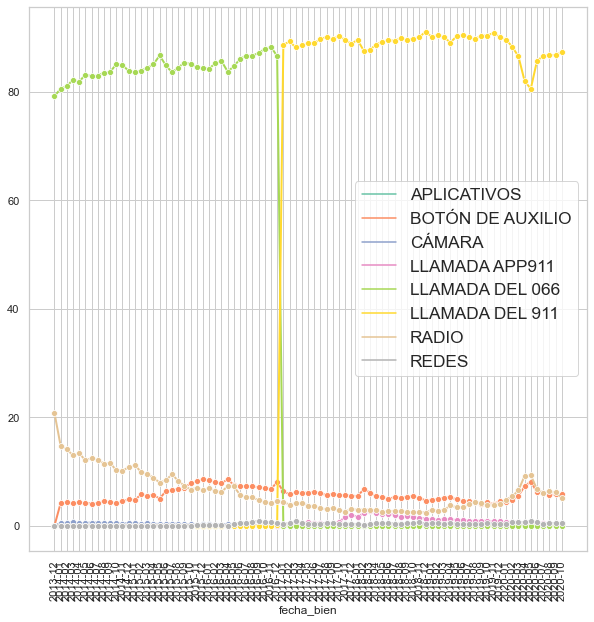

In [207]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set2')
h =sns.lineplot(data=prop2,linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()